![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Median Filtering

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import cv2
from skimage.morphology import remove_small_objects, binary_dilation
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage.measure import label


In [ ]:
def im_gaussian(_img, k, sigma=None):
    """
    This method applies a gaussian filtering on image _img.

    Args:
        _img (ndarray): a gray-valued image
        k (int): value to define the mask size
        sigma (float): value to control the sigma parameter. Default k/8.5.

    Returns:
        img_j (ndarray): filtered image
    """
    if not sigma:
        sigma = k / 8.5

    img_j = cv2.GaussianBlur(_img, (k, k), sigma)

    return img_j

def im_median(_img, k):
    """
    Applies median filter to an gray-scaled image.

    Args:
    _img (ndarray): a gray-scale image.
    k (int): value to define number of pixels of the median mask

    Returns:
     img_j (ndarray): filtered image.
    """
    img_j = cv2.medianBlur(_img, k)

    return img_j


def binview(img, mask, color='r', dilate_pixels=1):
    """
    Displays a gray or color image 'img' overlaid by color pixels determined a by binary image 'mask'. It is useful to
    display the edges of an image.

    Args:
        img: gray scale image (X-ray)
        mask: binary image that works as mask
        color: string to define pixel color.
                'r': red (default)
                'g': green
                'b': blue
                'y': yellow
                'c': cyan
                'm': magenta
                'k': black
                'w': white

        dilate_pixels (int): Number of pixels used for dilate the mask.

    Returns:
        img_color (ndarray): output image with a mask overlaid.
    """

    # Defines colors
    # colors = {
    #     'r': np.array([255, 0, 0]),
    #     'g': np.array([0, 255, 0]),
    #     'b': np.array([0, 0, 255]),
    #     'y': np.array([255, 255, 0]),
    #     'c': np.array([0, 255, 255]),
    #     'm': np.array([255, 0, 255]),
    #     'k': np.array([0, 0, 0]),
    #     'w': np.array([255, 255, 255])
    # }
    #
    colors = {
        'r': np.array([1, 0, 0]),
        'g': np.array([0, 1, 0]),
        'b': np.array([0, 0, 1]),
        'y': np.array([1, 1, 0]),
        'c': np.array([0, 1, 1]),
        'm': np.array([1, 0, 1]),
        'k': np.array([0, 0, 0]),
        'w': np.array([1, 1, 1])
    }
    # Create a RGB image from grayscale image.
    img_color = np.dstack((img, img, img))

    # Ensure do not modify the original color image and the mask
    img_color = img_color.copy()

    mask_ = mask.copy()
    # mask_ = dilate(mask_, np.ones((g, g), np.uint8))
    mask_ = binary_dilation(mask_, np.ones((dilate_pixels, dilate_pixels)))

    # Now black-out the area of the mask
    # img_fg = bitwise_and(img, img, mask=mask_)

    # Defines the pixel color used for the mask in the figure.
    cc = colors[color]
    #
    # for i in range(3):
    #     img_color[:, :, i] = cc[i] * img_fg

    # remove artifacts connected to image border
    cleared = clear_border(mask_)
    if np.all(cleared):
        mask_ = cleared

    # label image regions
    label_image = label(mask_)
    img_color = label2rgb(label_image, image=img_color, colors=[cc], bg_label=0)

    return img_color  # add(img_color, img_color)


In [ ]:
!wget https://www.dropbox.com/s/a9jz5485h9k3pqa/wheel.bmp

--2023-10-30 13:28:29--  https://www.dropbox.com/s/a9jz5485h9k3pqa/wheel.bmp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/a9jz5485h9k3pqa/wheel.bmp [following]
--2023-10-30 13:28:30--  https://www.dropbox.com/s/raw/a9jz5485h9k3pqa/wheel.bmp
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05c207114cb61de229451cc771.dl.dropboxusercontent.com/cd/0/inline/CGk56CFw1vI31wREfCIp5eFw8mjBAzmJ7eTAySMcNnOxh2gzS5QgHnBQBjwUL3GL63eQ6QLNiHIUqPP61SxSYOZhqnZMBJOvXL-1So6y0hHZ_KWMjA__R5m8PW2V5yLp9lo/file# [following]
--2023-10-30 13:28:30--  https://uc05c207114cb61de229451cc771.dl.dropboxusercontent.com/cd/0/inline/CGk56CFw1vI31wREfCIp5eFw8mjBAzmJ7eTAySMcNnOxh2gzS5QgHnBQBjwUL3GL63eQ6QLNiHIUqPP61SxSYOZhqnZMBJOvXL-1So6y0hHZ_KWMjA__R5m8PW2V5yLp9lo/

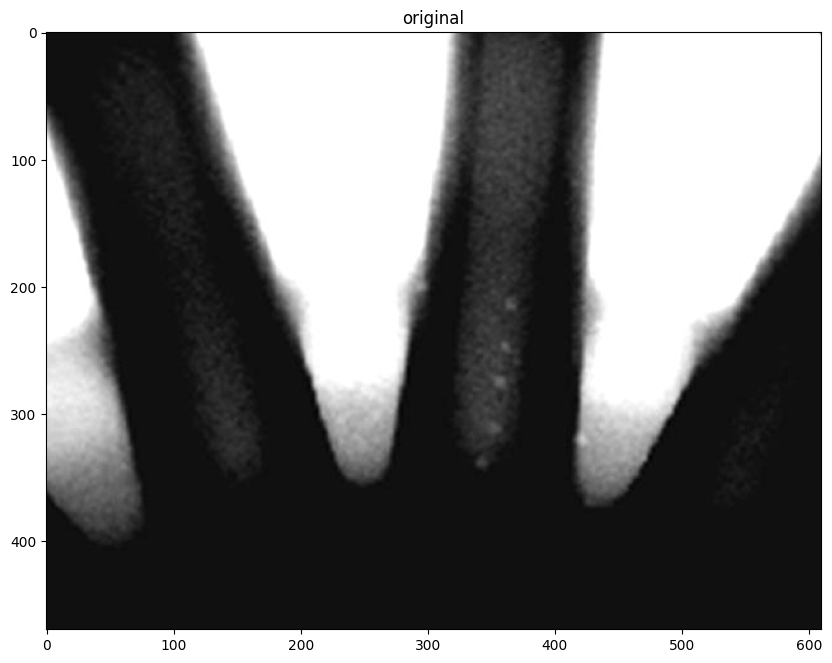

In [ ]:
X = cv2.imread('wheel.bmp',0)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.title('original')
plt.show()

In [ ]:
Xg = im_gaussian(X, k=5)  # Low pass filtering


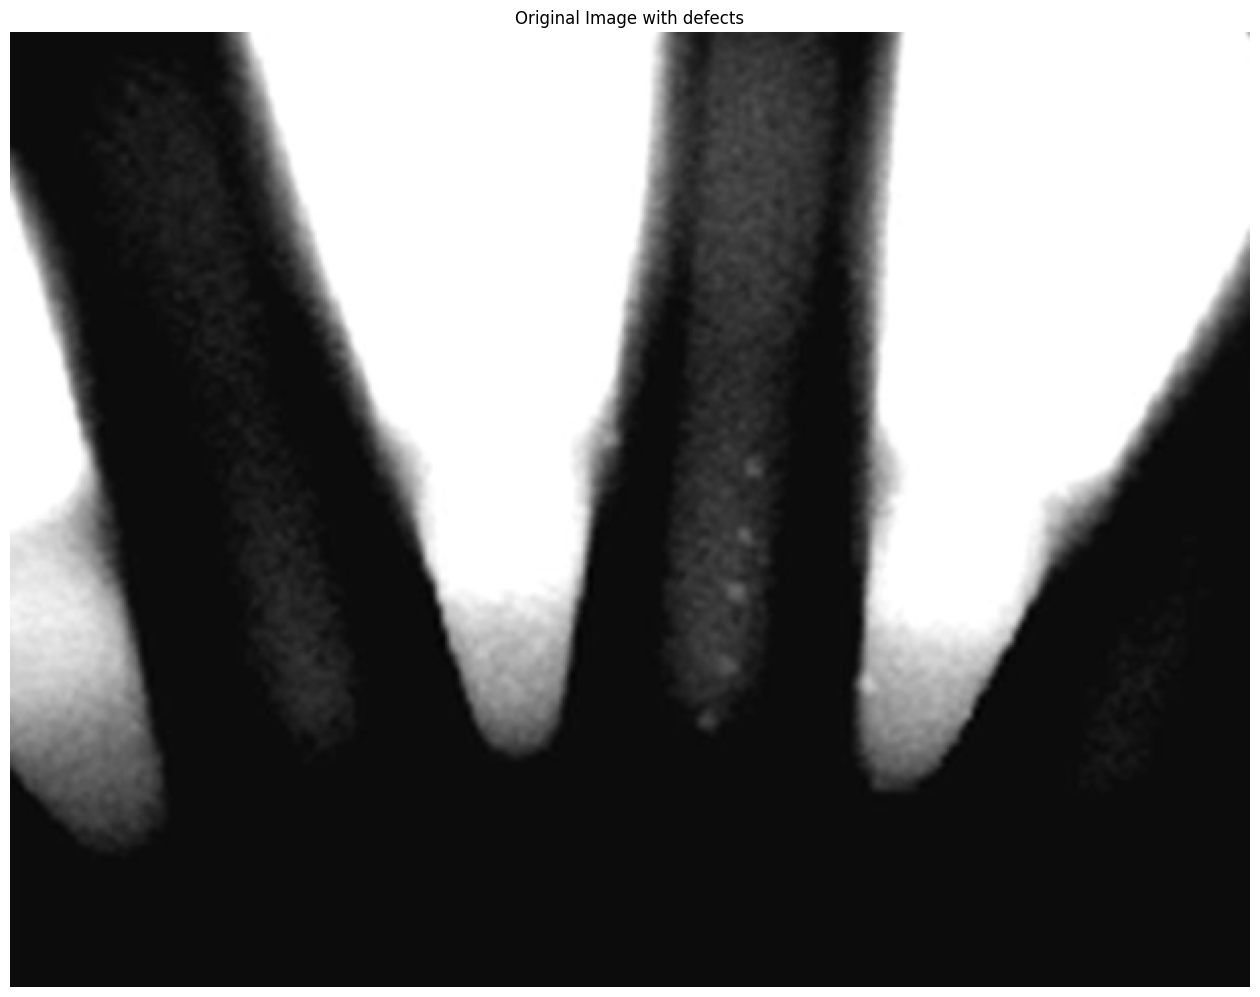

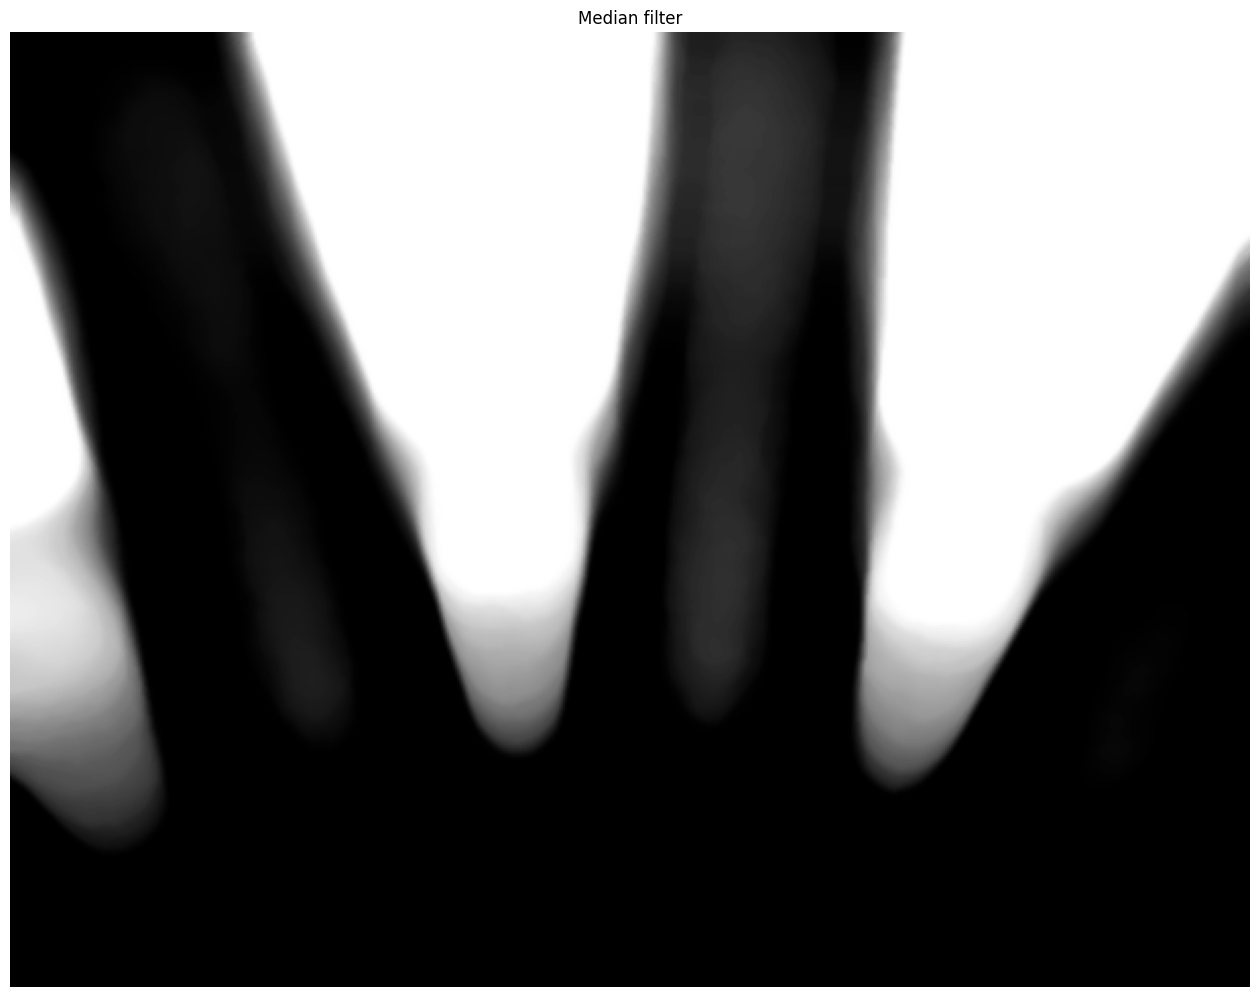

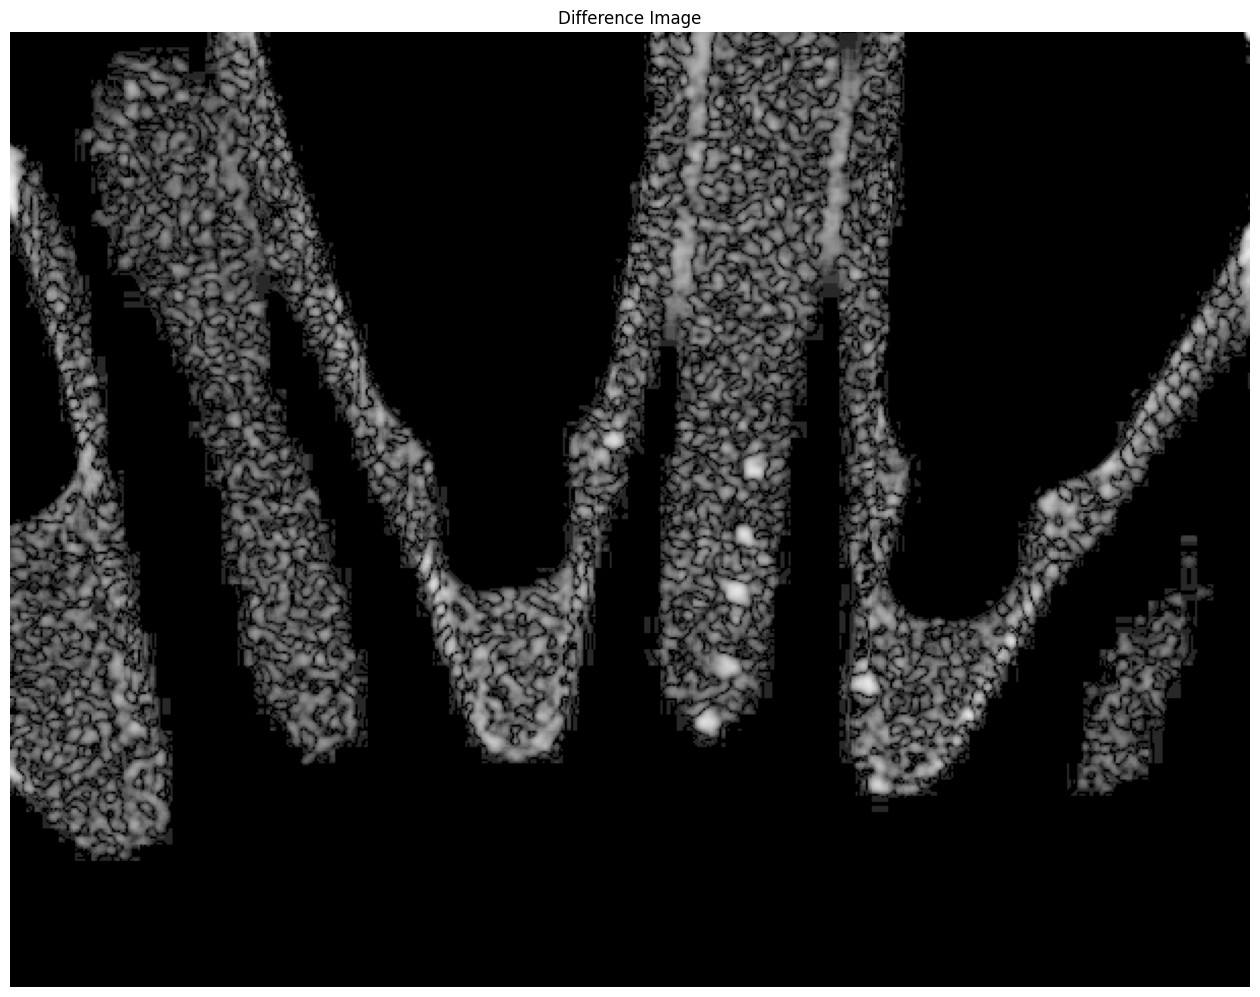

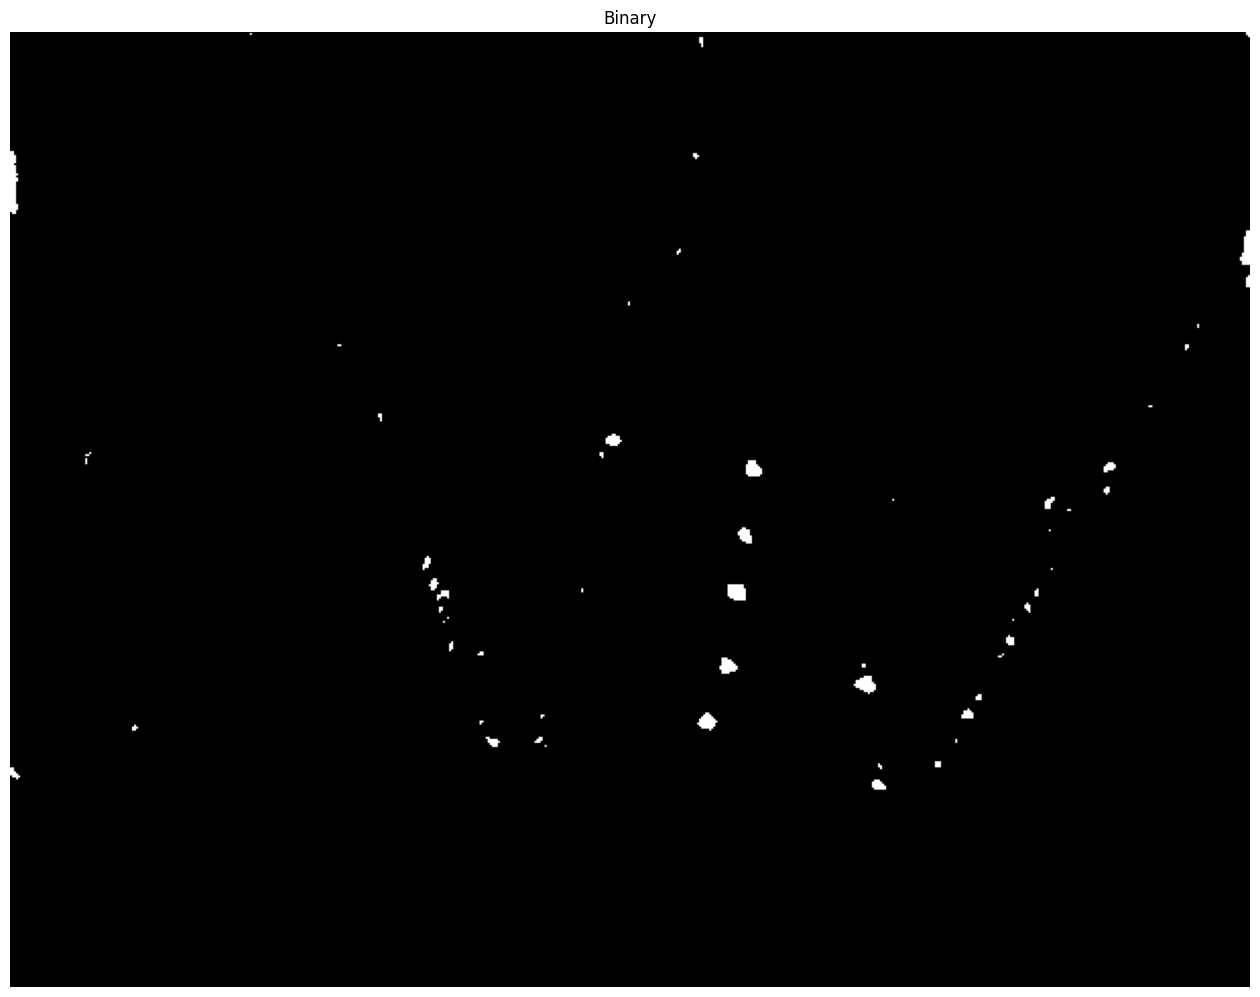

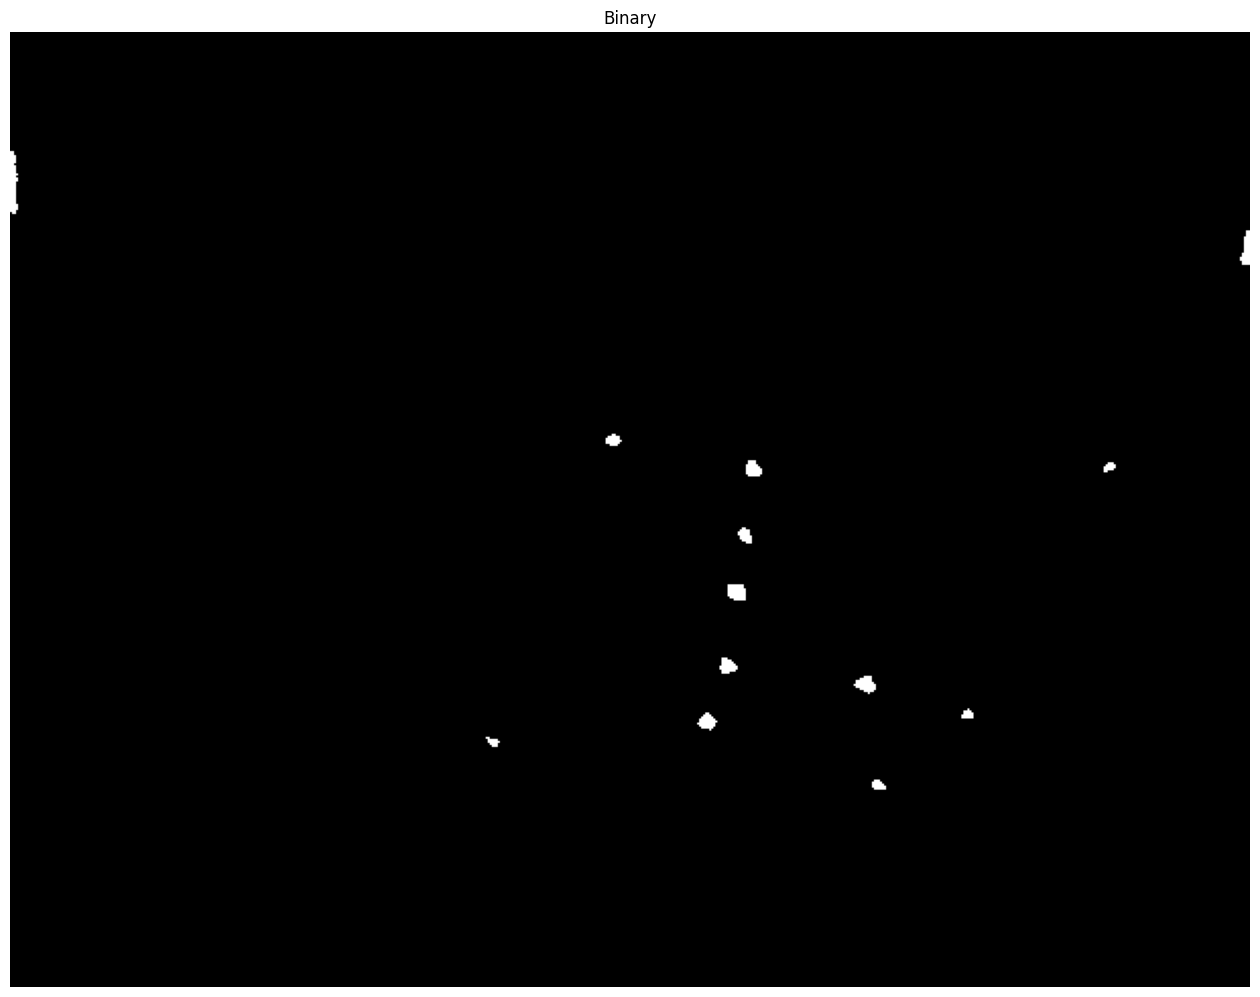

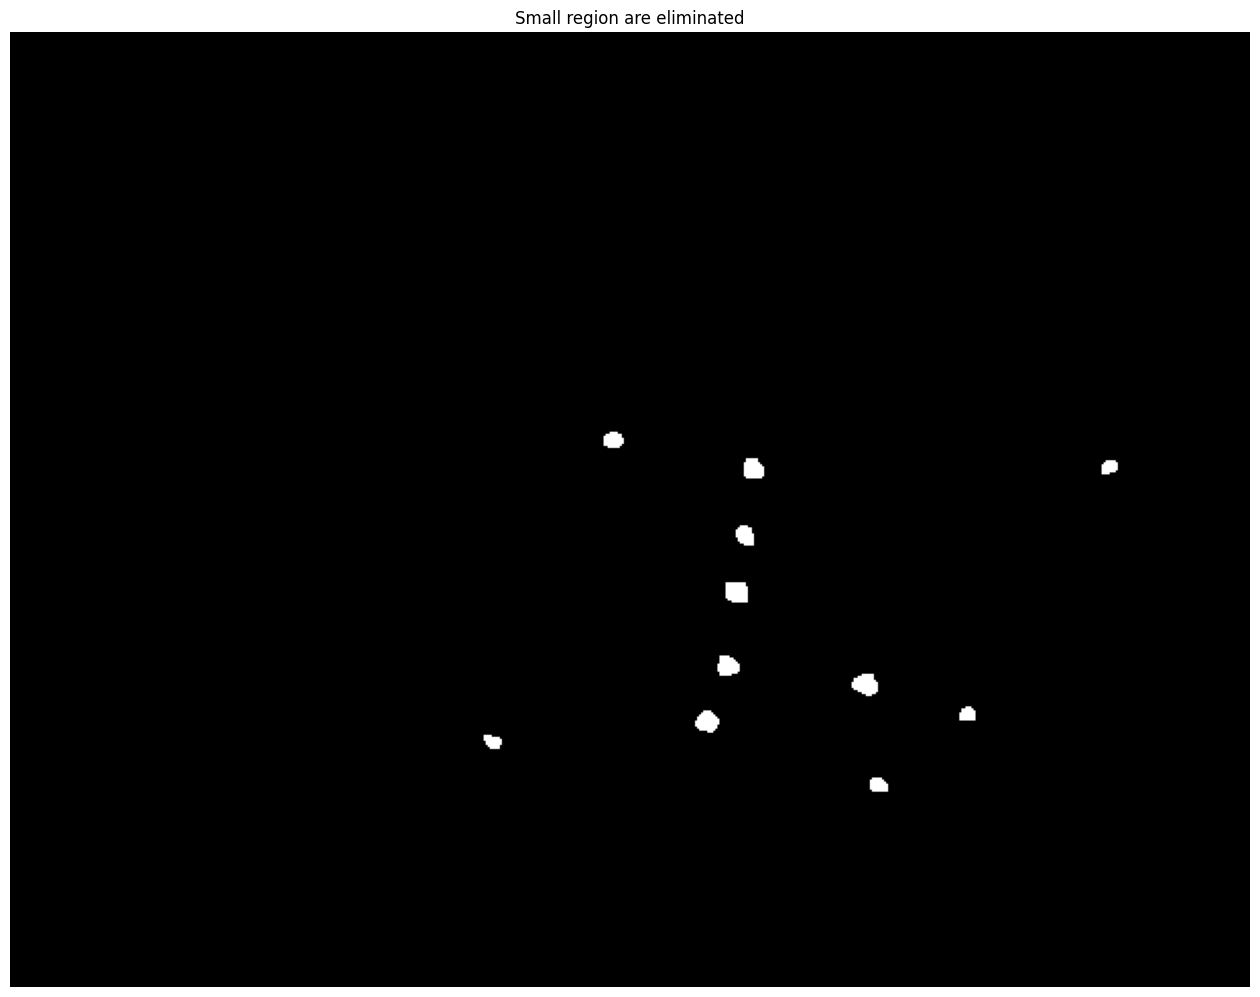

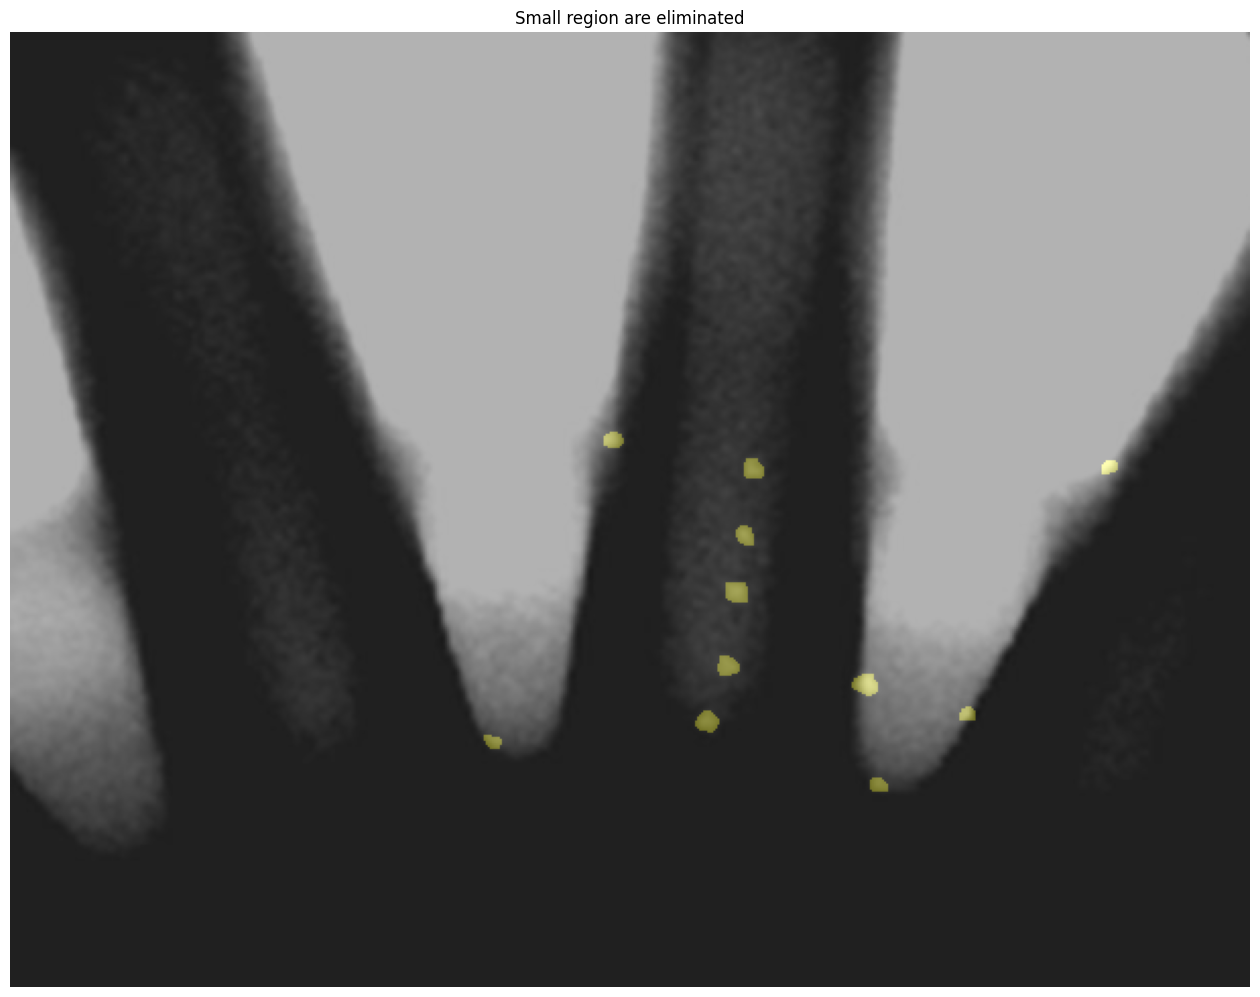

In [ ]:
X = im_gaussian(X, k=5)  # Low pass filtering

fig1, ax1 = plt.subplots(1, 1, figsize=(16, 16))
ax1.set_title('Original Image with defects')
ax1.imshow(X, cmap='gray')
ax1.axis('off')
plt.show()

Y0 = im_median(X, k=23)
fig2, ax2 = plt.subplots(1, 1, figsize=(16, 16))
ax2.set_title('Median filter')
ax2.imshow(Y0, cmap='gray')
ax2.axis('off')
plt.show()

Y1 = np.abs(np.double(X) - np.double(Y0))
fig3, ax3 = plt.subplots(1, 1, figsize=(16, 16))
ax3.set_title('Difference Image')
ax3.imshow(np.log10(Y1 + 1), cmap='gray')
ax3.axis('off')
plt.show()

Y2 = Y1 > 18
fig4, ax4 = plt.subplots(1, 1, figsize=(16, 16))
ax4.set_title('Binary')
ax4.imshow(Y2, cmap='gray')
ax4.axis('off')
plt.show()

Y3 = remove_small_objects(Y2, 20)
fig5, ax5 = plt.subplots(1, 1, figsize=(16, 16))
ax5.set_title('Binary')
ax5.imshow(Y3, cmap='gray')
ax5.axis('off')
plt.show()

Y = clear_border(binary_dilation(Y3, np.ones((3, 3))))
fig6, ax6 = plt.subplots(1, 1, figsize=(16, 16))
ax6.set_title('Small region are eliminated')
ax6.imshow(Y, cmap='gray')
ax6.axis('off')
plt.show()

blend_mask = binview(X, Y, 'y', 1)
fig6, ax6 = plt.subplots(1, 1, figsize=(16, 16))
ax6.set_title('Small region are eliminated')
ax6.imshow(blend_mask, cmap='gray')
ax6.axis('off')
plt.show()
